In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

data = pd.read_csv('Titanic.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: xlabel='Survived', ylabel='count'>

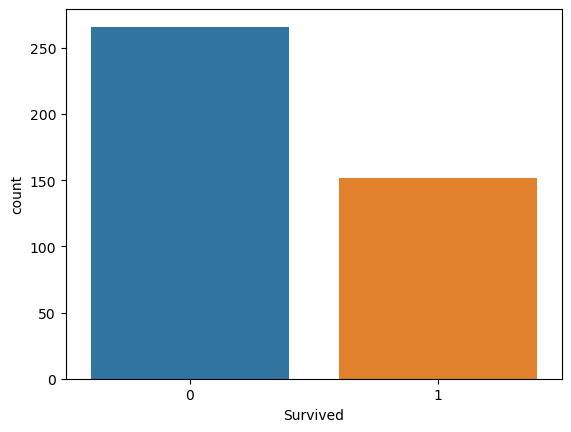

In [5]:
sns.countplot(data, x = 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

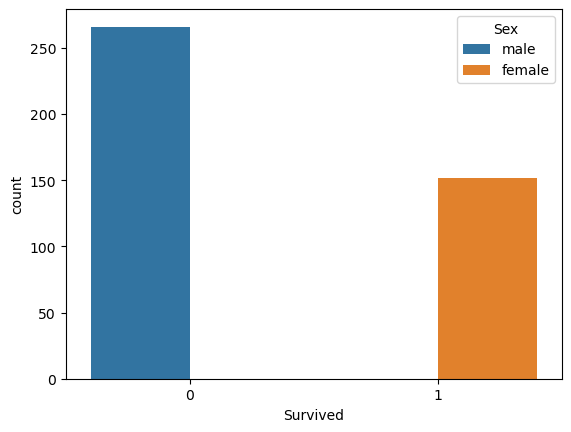

In [7]:
sns.countplot(data, x = "Survived", hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

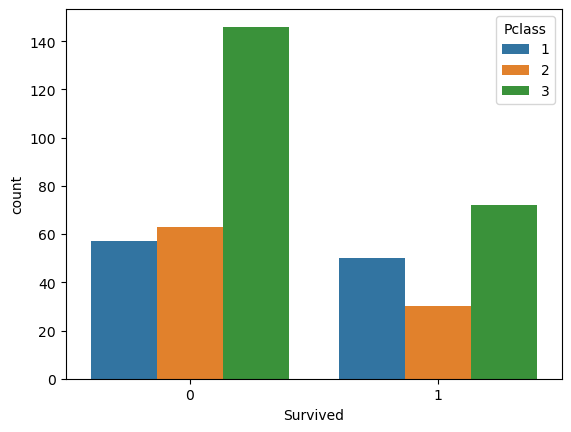

In [9]:
sns.countplot(data, x = "Survived", hue="Pclass")

<Axes: ylabel='Frequency'>

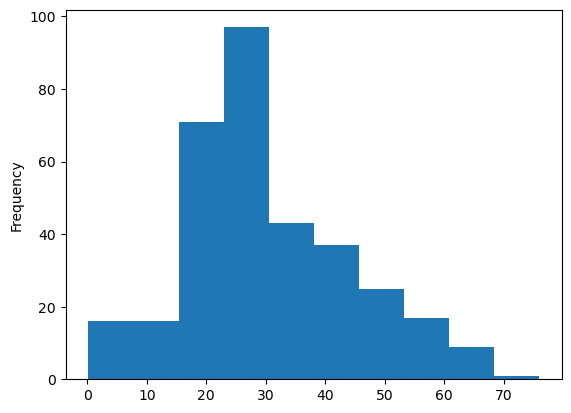

In [10]:
data['Age'].plot.hist()

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

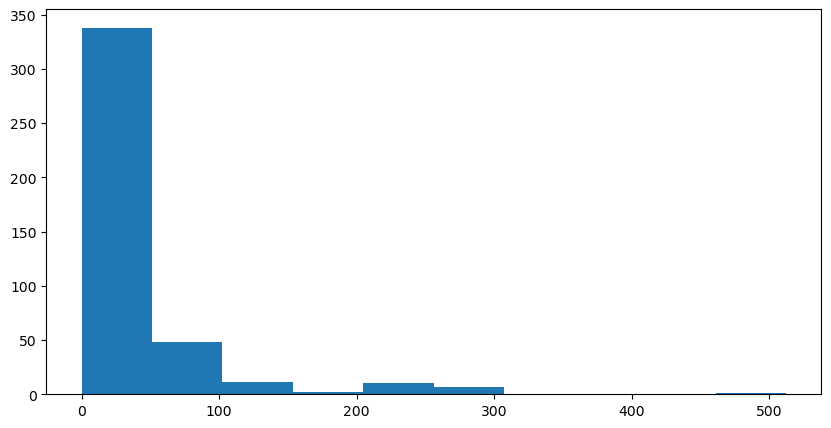

In [14]:
data['Fare'].plot.hist(bin = 20, figsize =(10,5))

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

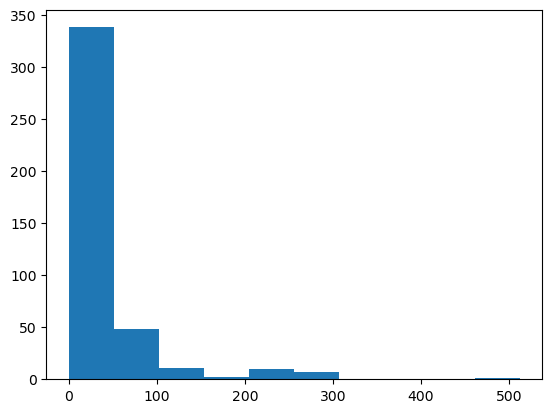

In [17]:
plt.hist(data['Fare'])

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

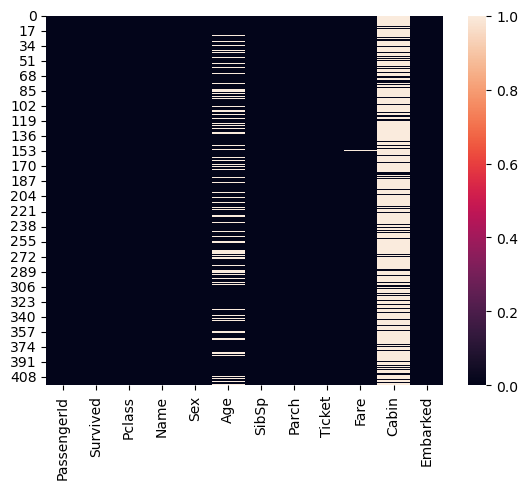

In [23]:
sns.heatmap(data.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

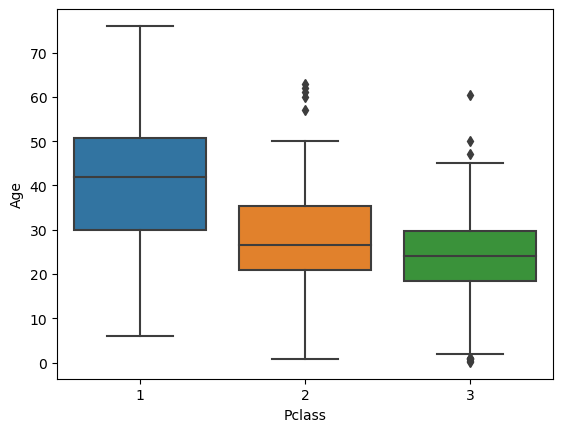

In [25]:
sns.boxplot(data, x='Pclass', y='Age')

# Data Wrangling

### Clean the data by removing the Nan values and unnecessary columns in the dataset

In [27]:
data.drop('Cabin', axis = 1, inplace =True)

In [31]:
data.dropna(inplace=True)

In [32]:
 data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
sex = pd.get_dummies(data['Sex'], drop_first=True)

In [36]:
embark = pd.get_dummies(data['Embarked'], drop_first=True)

In [38]:
pclass = pd.get_dummies(data['Pclass'], drop_first=True)

In [39]:
data = pd.concat([data, sex, embark, pclass], axis = 1)

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,True,True,False,False,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False,False,True,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,True,True,False,True,False
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,True,False,True,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,False,False,True,False,True
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q,False,True,False,False,False
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,False,False,True,False,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,False,False,False,False,False


In [44]:
data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)

In [45]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,34.5,0,0,7.8292,True,True,False,False,True
1,1,3,47.0,1,0,7.0000,False,False,True,False,True
2,0,2,62.0,0,0,9.6875,True,True,False,True,False
3,0,3,27.0,0,0,8.6625,True,False,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
409,1,3,3.0,1,1,13.7750,False,False,True,False,True
411,1,1,37.0,1,0,90.0000,False,True,False,False,False
412,1,3,28.0,0,0,7.7750,False,False,True,False,True
414,1,1,39.0,0,0,108.9000,False,False,False,False,False


In [46]:
data.drop(['Pclass'], axis = 1, inplace=True)

In [47]:
data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,True,True,False,False,True
1,1,47.0,1,0,7.0000,False,False,True,False,True
2,0,62.0,0,0,9.6875,True,True,False,True,False
3,0,27.0,0,0,8.6625,True,False,True,False,True
4,1,22.0,1,1,12.2875,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
409,1,3.0,1,1,13.7750,False,False,True,False,True
411,1,37.0,1,0,90.0000,False,True,False,False,False
412,1,28.0,0,0,7.7750,False,False,True,False,True
414,1,39.0,0,0,108.9000,False,False,False,False,False


# Train Data

In [49]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logm = LogisticRegression()

In [58]:
 X_train.columns = X_train.columns.astype(str)

In [61]:
 X_test.columns = X_test.columns.astype(str)

In [59]:
logm.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
predictions = logm.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

In [66]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        57\n           1       1.00      1.00      1.00        43\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [67]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test, predictions)

array([[57,  0],
       [ 0, 43]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,predictions)*100

100.0